In [1]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P10013.3. Data Visualization/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P10013.3. Data Visualization/Output')
cur_date = "030522"

library(readxl)
library(tidyverse)
library(MetBrewer)
library(car)

#reading in file
pdf_data = data.frame(read_excel("Wildfire_InVitro_NTA_data_030421.xlsx")) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
head(pdf_data)

,Sample.Identifier.NTA.PDF,Group.Label,Original.Concentration..Particles..mL.,Particle.Count,X10,X50,X90,Charge..mV.
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20220201_0000_sample1_size,Co-culture unexposed,2.1e+09,1.05e+08,79.0,132.7,202.9,-8.18
2,20220201_0008_sample2_size,Co-culture unexposed,4.1e+09,2.05e+08,79.3,137.0,230.7,-19.40
3,20220201_0016_sample3_size,Co-culture unexposed,6.8e+09,3.40e+08,77.8,134.7,223.6,-21.55
4,20220201_0026_sample4_size,Co-culture unexposed,7.8e+09,3.90e+08,65.2,116.7,207.7,-5.71
5,20220202_0000_sample5_size,Co-culture unexposed,2.3e+09,1.15e+08,76.2,122.5,224.7,-24.52
6,20220202_0009_sample6_size,Co-culture unexposed,1.6e+10,8.00e+08,82.5,137.7,241.8,-27.16


In [3]:
longer_pdf_data = pdf_data %>% 
    #removing 2 values with missing group labels
    drop_na() %>%
    pivot_longer(cols = 3:8, names_to = "Variable", values_to = "Value")

#making group labels into a factor
longer_pdf_data$Group.Label = factor(longer_pdf_data$Group.Label, labels = c("Co-culture unexposed", 
                                        "Co-cultured exposed", "Tri-culture unexposed", "Tri-culture exposed"))
head(longer_pdf_data)

Sample.Identifier.NTA.PDF,Group.Label,Variable,Value
<chr>,<fct>,<chr>,<dbl>
20220201_0000_sample1_size,Co-cultured exposed,Original.Concentration..Particles..mL.,2.100e+09
20220201_0000_sample1_size,Co-cultured exposed,Particle.Count,1.050e+08
20220201_0000_sample1_size,Co-cultured exposed,X10,7.900e+01
20220201_0000_sample1_size,Co-cultured exposed,X50,1.327e+02
20220201_0000_sample1_size,Co-cultured exposed,X90,2.029e+02
20220201_0000_sample1_size,Co-cultured exposed,Charge..mV.,-8.180e+00


# Data Distribution Visualization

In [4]:
metbrewer_colors = MetPalettes$Lakota[[1]]

#new facet wrap labels
facet_names = as_labeller(c("Charge..mV." = "Charge (mV)", "Original.Concentration..Particles..mL." = "Concentration in Conditioned \n Media (Particles/mL)", 
                            "Particle.Count" = "NTA Particle Count in PBS \n Resuspension", "X10" = "10% Particle Diameter (nm)", "X50" = 
                "Median Particle Diameter (nm)", "X90" = "90% Particle Diameter (nm)"))

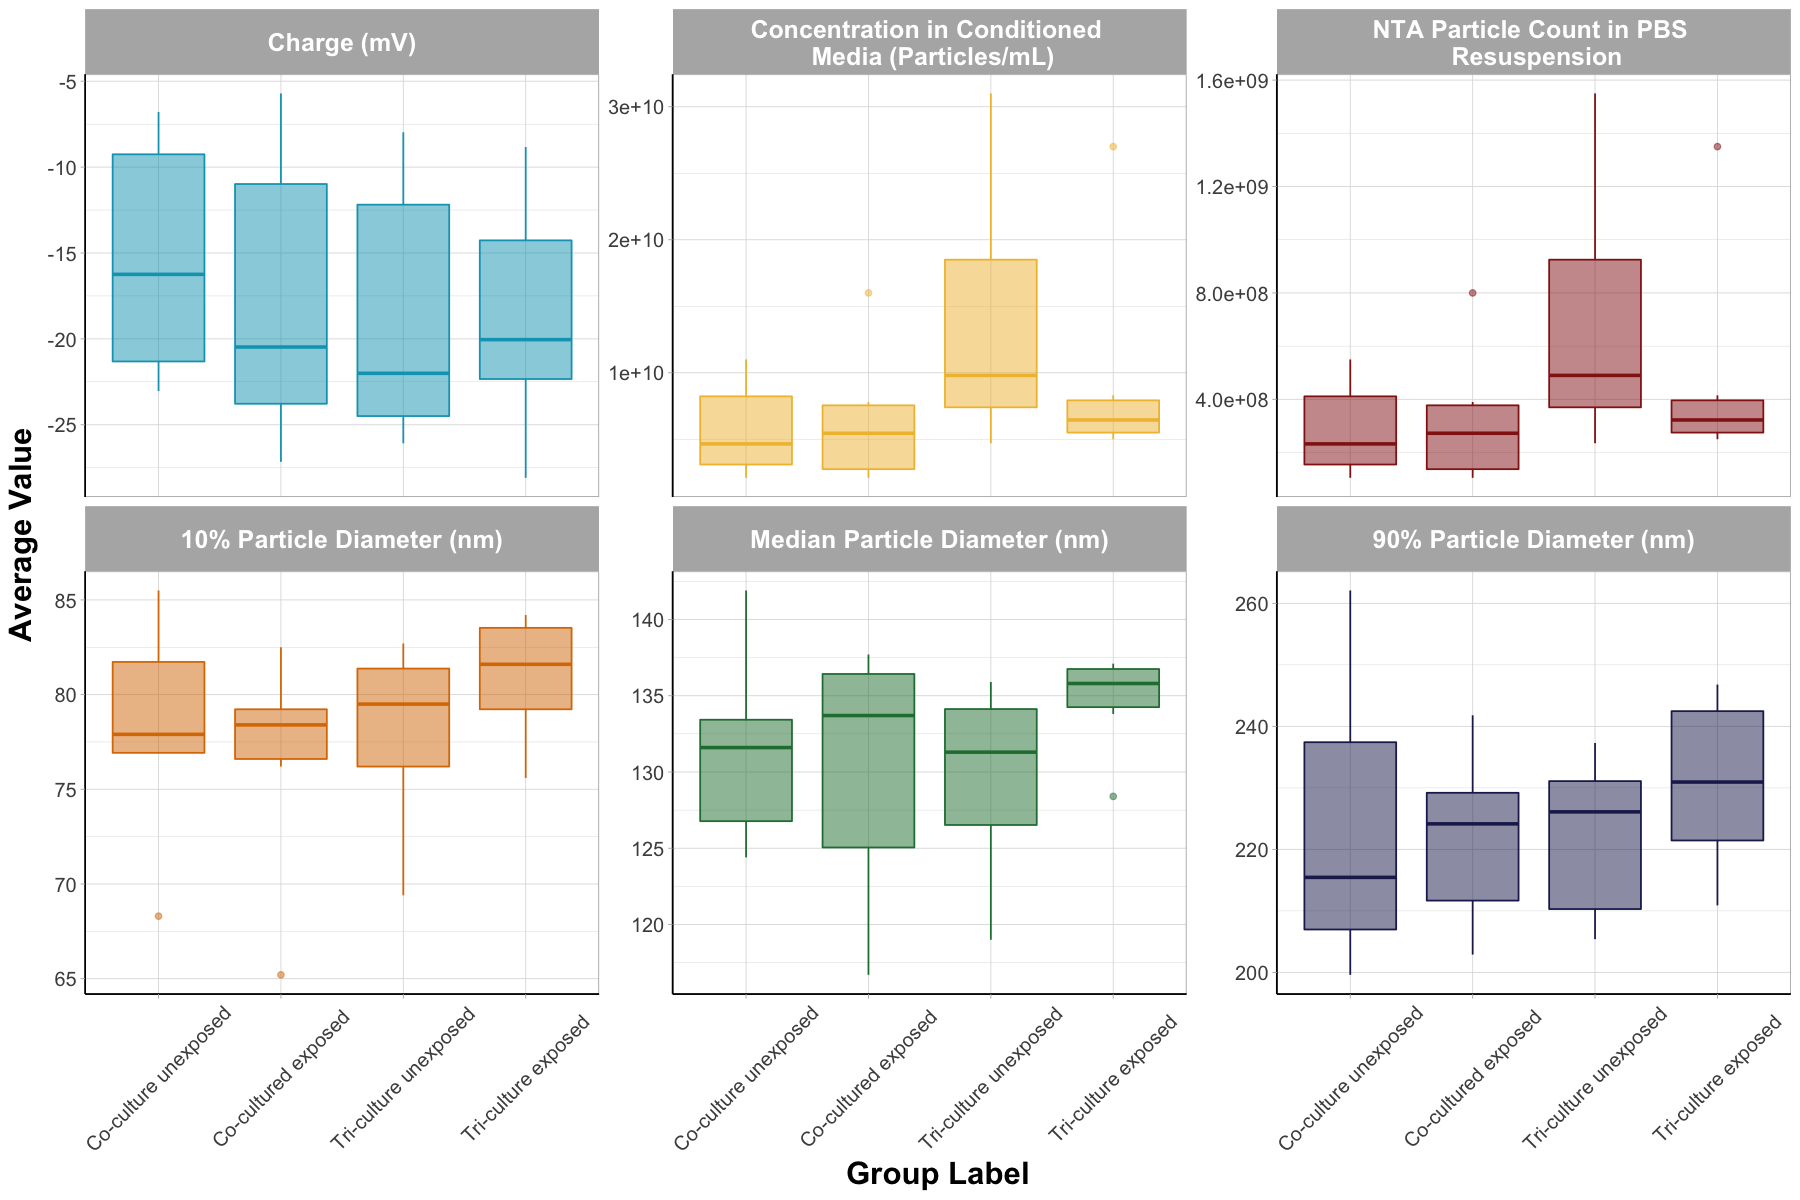

In [5]:

options(repr.plot.width=15, repr.plot.height=10) #changing size
ggplot() + 
  geom_boxplot(data = longer_pdf_data, aes(x = Group.Label, y = Value, fill = Variable, color = Variable),
              alpha = 0.5) + 

  
  facet_wrap(~Variable, scales = "free_y", labeller = as_labeller(facet_names)) + 

  theme_light() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.position = "none",
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Group Label') + ylab('Average Value') + #changing axis labels 

scale_color_manual(name = "Variable", values = metbrewer_colors) + 
scale_fill_manual(name = "Variable", values = metbrewer_colors)

# ANOVA

Determining if there are statistically significant between groups.

In [6]:
#first normalizing data
anova_df = longer_pdf_data %>%
    group_by(Group.Label, Variable) %>%
    mutate(Norm_Value = scale(Value))
head(anova_df)

Sample.Identifier.NTA.PDF,Group.Label,Variable,Value,Norm_Value
<chr>,<fct>,<chr>,<dbl>,"<dbl[,1]>"
20220201_0000_sample1_size,Co-cultured exposed,Original.Concentration..Particles..mL.,2.100e+09,-0.8506550
20220201_0000_sample1_size,Co-cultured exposed,Particle.Count,1.050e+08,-0.8506550
20220201_0000_sample1_size,Co-cultured exposed,X10,7.900e+01,0.3895459
20220201_0000_sample1_size,Co-cultured exposed,X50,1.327e+02,0.2884757
20220201_0000_sample1_size,Co-cultured exposed,X90,2.029e+02,-1.3131145
20220201_0000_sample1_size,Co-cultured exposed,Charge..mV.,-8.180e+00,1.0866308


In [7]:
#contrasts show what compartments are being compared in anova
#these comparisons aren't what we want so I changed them in the function below
contrasts(anova_df$Group.Label)

,Co-cultured exposed,Tri-culture unexposed,Tri-culture exposed
Co-culture unexposed,0,0,0
Co-cultured exposed,1,0,0
Tri-culture unexposed,0,1,0
Tri-culture exposed,0,0,1


                   Table of Contrasts
>                   Co-cul Un   |  Co-cul Exp  |  Tri-cul Un  |   Tri-cul Exp   |   Sum
>     Contrast 1 |       -3     |       1      |       1      |         1       |    0
>     Contrast 2 |        0     |      -2      |       1      |         1       |    0
>     Contrast 2 |        0     |       0      |      -1      |         1       |    0

> - Contrast 1: compares Co-culture unexposed to everything else
> - Contrast 2: compares co-culture exposed to both tri-cultures
> - Contrast 3: compares tri-cultures to each other

In [8]:
contrasts(anova_df$Group.Label) = cbind(c(-3,1,1,1), c(0,-2,1,1), c(0,0,-1,1)) #meaning is specified above
contrasts(anova_df$Group.Label)

Co-culture unexposed,-3,0,0
Co-cultured exposed,1,-2,0
Tri-culture unexposed,1,1,-1
Tri-culture exposed,1,1,1


In [9]:
anova_value = Anova(aov(Norm_Value ~ Group.Label, data = anova_df), type = 'III')
anova_value

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0,1,0,1
Group.Label,0,3,0,1
Residuals,120,140,NA,NA
